In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
%matplotlib inline

In [36]:
data = pd.read_csv(r"C:\Users\reddy\Desktop\Downloads\DS_Final\uber data.csv")
testdata = pd.read_csv(r"C:\Users\reddy\Desktop\Downloads\DS_Final\test.csv")
print(data.columns)

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')


In [37]:
data.head(), print(data.columns)

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')


(                             key  fare_amount          pickup_datetime  \
 0    2009-06-15 17:26:21.0000001          4.5  2009-06-15 17:26:21 UTC   
 1    2010-01-05 16:52:16.0000002         16.9  2010-01-05 16:52:16 UTC   
 2   2011-08-18 00:35:00.00000049          5.7  2011-08-18 00:35:00 UTC   
 3    2012-04-21 04:30:42.0000001          7.7  2012-04-21 04:30:42 UTC   
 4  2010-03-09 07:51:00.000000135          5.3  2010-03-09 07:51:00 UTC   
 
    pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
 0        -73.844311        40.721319         -73.841610         40.712278   
 1        -74.016048        40.711303         -73.979268         40.782004   
 2        -73.982738        40.761270         -73.991242         40.750562   
 3        -73.987130        40.733143         -73.991567         40.758092   
 4        -73.968095        40.768008         -73.956655         40.783762   
 
    passenger_count  
 0                1  
 1                1  
 2          

In [4]:
data.info(),print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB


In [5]:
data.describe(),print(data.columns)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.342877,-72.506121,39.922326,-72.518673,39.925579,1.682445
std,9.837855,11.608097,10.048947,10.724226,6.751120,1.306730
min,-44.900000,-736.550000,-3116.285383,-1251.195890,-1189.615440,0.000000
25%,6.000000,-73.992050,40.735007,-73.991295,40.734092,1.000000
50%,8.500000,-73.981743,40.752761,-73.980072,40.753225,1.000000
75%,12.500000,-73.967068,40.767127,-73.963508,40.768070,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [38]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
print(data.columns)

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')


In [39]:
data['date'] = data['pickup_datetime'].apply(lambda d: d.day)
data['month'] = data['pickup_datetime'].apply(lambda d: d.month)
data['year'] = data['pickup_datetime'].apply(lambda d: d.year)
#data['day'] = data['pickup_datetime'].apply(lambda d: d.weekday)
data['day'] = data['pickup_datetime'].dt.dayofweek.astype('int64')
data['hour'] = data['pickup_datetime'].apply(lambda d: d.hour)
print(data.columns)

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'date', 'month', 'year', 'day', 'hour'],
      dtype='object')


In [8]:
data['year']

0         2009
1         2010
2         2011
3         2012
4         2010
          ... 
199995    2011
199996    2012
199997    2012
199998    2013
199999    2015
Name: year, Length: 200000, dtype: int64

In [9]:
data['day']

0         0
1         1
2         3
3         5
4         1
         ..
199995    3
199996    2
199997    5
199998    1
199999    1
Name: day, Length: 200000, dtype: int64

In [40]:
data.info(),print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                200000 non-null  object             
 1   fare_amount        200000 non-null  float64            
 2   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   200000 non-null  float64            
 4   pickup_latitude    200000 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    200000 non-null  int64              
 8   date               200000 non-null  int64              
 9   month              200000 non-null  int64              
 10  year               200000 non-null  int64              
 11  day                200000 non-null  int64              
 12  hour               200000 non-

(None, None)

In [11]:
data.drop(['key','pickup_datetime'], axis=1, inplace=True)

In [41]:
data.info(),print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                200000 non-null  object             
 1   fare_amount        200000 non-null  float64            
 2   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   200000 non-null  float64            
 4   pickup_latitude    200000 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    200000 non-null  int64              
 8   date               200000 non-null  int64              
 9   month              200000 non-null  int64              
 10  year               200000 non-null  int64              
 11  day                200000 non-null  int64              
 12  hour               200000 non-

(None, None)

In [13]:
data.dropna(how='any',inplace=True)

In [42]:
data.info(),print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                200000 non-null  object             
 1   fare_amount        200000 non-null  float64            
 2   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   200000 non-null  float64            
 4   pickup_latitude    200000 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    200000 non-null  int64              
 8   date               200000 non-null  int64              
 9   month              200000 non-null  int64              
 10  year               200000 non-null  int64              
 11  day                200000 non-null  int64              
 12  hour               200000 non-

(None, None)

In [15]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,year,day,hour
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.342871,-72.506114,39.922322,-72.518673,39.925579,1.682453,15.684483,6.272296,2011.740439,3.038870,13.519398
std,9.837879,11.608125,10.048972,10.724226,6.751120,1.306727,8.673350,3.443952,1.862284,1.949463,6.505667
min,-44.900000,-736.550000,-3116.285383,-1251.195890,-1189.615440,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000
25%,6.000000,-73.992050,40.735006,-73.991295,40.734092,1.000000,8.000000,3.000000,2010.000000,1.000000,9.000000
50%,8.500000,-73.981743,40.752762,-73.980072,40.753225,1.000000,16.000000,6.000000,2012.000000,3.000000,14.000000
75%,12.500000,-73.967068,40.767128,-73.963508,40.768070,2.000000,23.000000,9.000000,2013.000000,5.000000,19.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000,31.000000,12.000000,2015.000000,6.000000,23.000000


In [16]:
min_lat = -90
max_lat = 90
min_long = -180
max_long = 180

In [17]:
data.drop(data[(data['pickup_longitude'] < min_long) | (data['pickup_longitude'] > max_long)].index, inplace=True)
data.drop(data[(data['dropoff_longitude'] < min_long) | (data['dropoff_longitude'] > max_long)].index, inplace=True)
data.drop(data[(data['pickup_latitude'] < min_lat) | (data['pickup_latitude'] > max_lat)].index, inplace=True)
data.drop(data[(data['dropoff_latitude'] < min_lat) | (data['dropoff_latitude'] > max_lat)].index, inplace=True)

C:\Users\reddy\AppData\Local\Temp\ipykernel_18660\3813873423.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['pickup_longitude'], ax=axs[0])
C:\Users\reddy\AppData\Local\Temp\ipykernel_18660\3813873423.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['dropoff_longitude'], ax=axs

<Axes: xlabel='dropoff_latitude', ylabel='Density'>

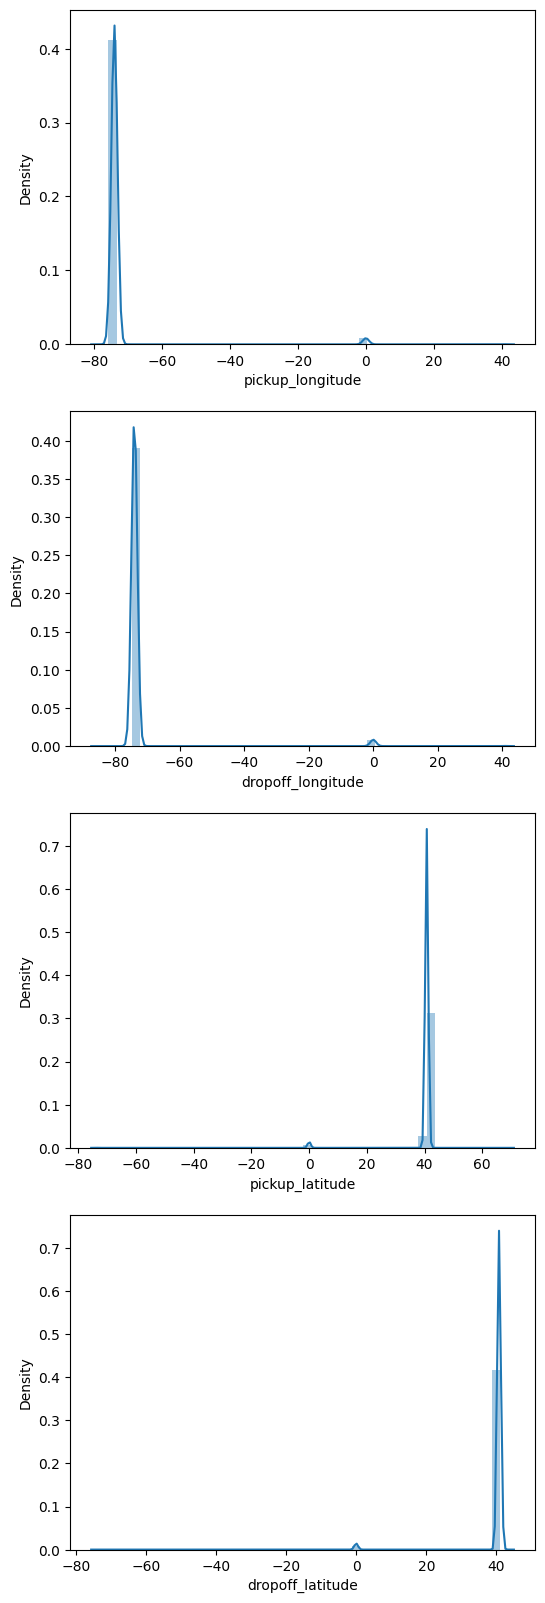

In [14]:
fig, axs = plt.subplots(4, figsize=(6,20))
sns.distplot(data['pickup_longitude'], ax=axs[0])
sns.distplot(data['dropoff_longitude'], ax=axs[1])
sns.distplot(data['pickup_latitude'], ax=axs[2])
sns.distplot(data['dropoff_latitude'], ax=axs[3])

In [18]:
data.drop(data[data['fare_amount']<=0].index,inplace=True)
data.drop(data[data['passenger_count']==0].index,inplace=True)

In [19]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,year,day,hour
count,199262.000000,199262.000000,199262.000000,199262.000000,199262.000000,199262.000000,199262.000000,199262.000000,199262.000000,199262.000000,199262.000000
mean,11.352172,-72.513289,39.927400,-72.511466,39.927302,1.688470,15.684059,6.274362,2011.741652,3.039079,13.518272
std,9.846891,10.397264,6.060304,10.400200,6.060996,1.305167,8.673776,3.443486,1.865087,1.949623,6.506546
min,0.010000,-78.083332,-74.007670,-84.654241,-74.035197,1.000000,1.000000,1.000000,2009.000000,0.000000,0.000000
25%,6.000000,-73.992049,40.735001,-73.991293,40.734092,1.000000,8.000000,3.000000,2010.000000,1.000000,9.000000
50%,8.500000,-73.981741,40.752761,-73.980069,40.753228,1.000000,16.000000,6.000000,2012.000000,3.000000,14.000000
75%,12.500000,-73.967065,40.767126,-73.963510,40.768070,2.000000,23.000000,9.000000,2013.000000,5.000000,19.000000
max,500.000000,40.811147,69.400000,40.851027,43.415190,6.000000,31.000000,12.000000,2015.000000,6.000000,23.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199262 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199262 non-null  float64
 1   pickup_longitude   199262 non-null  float64
 2   pickup_latitude    199262 non-null  float64
 3   dropoff_longitude  199262 non-null  float64
 4   dropoff_latitude   199262 non-null  float64
 5   passenger_count    199262 non-null  int64  
 6   date               199262 non-null  int64  
 7   month              199262 non-null  int64  
 8   year               199262 non-null  int64  
 9   day                199262 non-null  int64  
 10  hour               199262 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 18.2 MB


<Axes: >

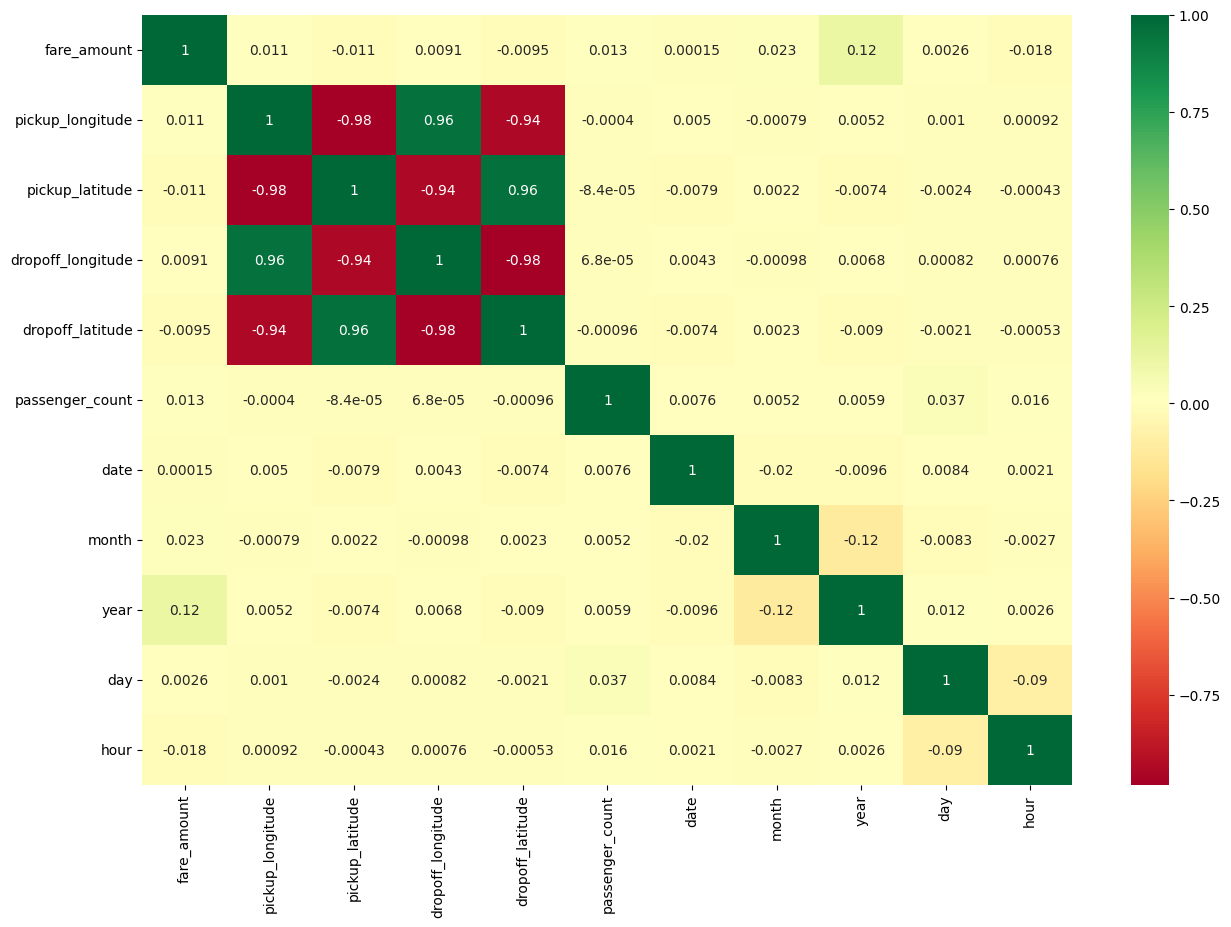

In [64]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True,cmap='RdYlGn')

In [21]:
x = data.drop('fare_amount',axis=1)
y = data['fare_amount']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 42)

In [23]:
# from sklearn.ensemble import RandomForestRegressor

# regressor = RandomForestRegressor(
#     bootstrap=True,
#     ccp_alpha=0.0,
#     criterion='squared_error',
#     max_depth=None,
#     max_features='sqrt',  # Change 'auto' to 'sqrt'
#     max_samples=None,
#     min_impurity_decrease=0.0,
#     min_samples_leaf=1,
#     min_samples_split=2,
#     min_weight_fraction_leaf=0.0,
#     n_estimators=100,
#     n_jobs=None,
#     oob_score=False,
#     random_state=42,
#     verbose=0,
#     warm_start=False
# )
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(
    bootstrap=True,
    ccp_alpha=0.0,
    criterion='squared_error',
    max_depth=None,
    max_features='sqrt',  # You can use 'auto' or set it to an appropriate value
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100,
    n_jobs=None,
    oob_score=False,
    random_state=42,
    verbose=0,
    warm_start=False
)




In [24]:
import sklearn
print(sklearn.__version__)

1.3.2


In [25]:
regressor.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', random_state=42)

In [87]:
regressor.score(x_train,y_train)

0.9683510458834603

In [32]:
predict = regressor.predict(x_test)

In [33]:
print(predict)

[ 8.406  8.38   7.945 ... 14.227  9.747 12.618]


In [89]:
from sklearn.metrics import r2_score, mean_squared_error

In [90]:
print("RMSE is: ", np.sqrt(mean_squared_error(y_test,predict)))

RMSE is:  5.20551042526814


In [91]:
import pickle

FileName = 'UberFarePredictor.pkl'

with open(FileName, 'wb') as f:
    pickle.dump(regressor, f)

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
param = [
    {
        "n_estimators":[10,50,100,200],
        "max_depth":[5,8,15,25,30,None],
        "min_samples_leaf":[1,2,5,10,25,100],
        "max_leaf_nodes":[2,5,10]
    }
]

In [28]:
grid = GridSearchCV(regressor,param_grid=param, cv=5, n_jobs=-1, verbose=3)